# Introduction to convolutional neural networks and computer vision with tensorflow

computer vision is the practice of writing algorithms which can discover patterns in visual data. such as the camera of a self-driving car recognizing the car in front

## Get the data

the images we're working with are from the food101 dataset (101 different classes of food): https://www.kaggle.com/datasets/dansbecker/food-101

however we've modified it to only use two classess (pizza & steak) using the image data modification notebook:
https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb

**Note:** we start with a smaller dataset so we can experiment quickly and figure out what works (or better yet what doesn't work before scaling up)

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2023-06-09 01:57:50--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.111.128, 142.251.16.128, 172.253.62.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.111.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   134MB/s    in 0.8s    

2023-06-09 01:57:51 (134 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## inspect the data (become one with it)

a very crucial step at the beginning of any machine learning project is becoming one with the data.

and for a computer vision project... this usually means visualizing many samples of your data

In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train

pizza  steak


In [ ]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [ ]:
import os

# walk throuh pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk('pizza_steak'):
  print(f"There area {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

There area 2 directories and 0 images in 'pizza_steak'
There area 2 directories and 0 images in 'pizza_steak/train'
There area 0 directories and 750 images in 'pizza_steak/train/pizza'
There area 0 directories and 750 images in 'pizza_steak/train/steak'
There area 2 directories and 0 images in 'pizza_steak/test'
There area 0 directories and 250 images in 'pizza_steak/test/pizza'
There area 0 directories and 250 images in 'pizza_steak/test/steak'


In [ ]:
!ls -all pizza_steak

total 16
drwxr-xr-x 4 root root 4096 Jun  9 01:57 .
drwxr-xr-x 1 root root 4096 Jun  9 01:57 ..
drwxr-xr-x 4 root root 4096 Jun  9 01:57 test
drwxr-xr-x 4 root root 4096 Jun  9 01:57 train


In [ ]:
# another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

to visualize our images, first let's get the class names programatically

In [ ]:
# get the classnames programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # created a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


In [ ]:
# let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # setup the target directory (we'll view images from here)
  target_folder = target_dir + target_class

  # get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"image shape: {img.shape}") # show the shape of the image

  return img

['1336882.jpg']
image shape: (512, 512, 3)


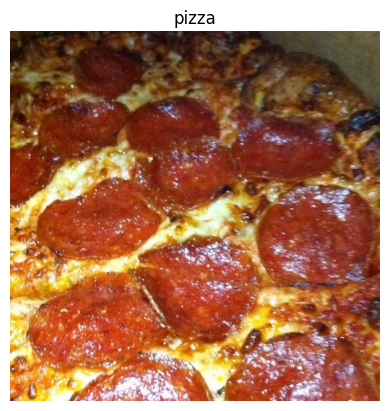

In [ ]:
# view a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

In [ ]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[ 54,  50,   5],
        [ 58,  53,  11],
        [ 59,  54,  14],
        ...,
        [101, 103,  79],
        [103, 105,  83],
        [104, 106,  84]],

       [[ 58,  54,   9],
        [ 56,  51,   9],
        [ 57,  52,  12],
        ...,
        [ 95,  95,  71],
        [ 93,  93,  69],
        [ 88,  90,  68]],

       [[ 66,  62,  17],
        [ 60,  53,  11],
        [ 58,  50,  11],
        ...,
        [ 89,  89,  65],
        [ 95,  95,  71],
        [ 97,  97,  73]],

       ...,

       [[136,  81,  61],
        [104,  49,  29],
        [ 93,  40,  22],
        ...,
        [149,  61,  23],
        [155,  70,  31],
        [161,  76,  37]],

       [[108,  61,  41],
        [ 95,  48,  30],
        [ 88,  42,  27],
        ...,
        [150,  62,  26],
        [158,  70,  34],
        [160,  75,  38]],

       [[ 97,  55,  33],
        [ 93,  50,  33],
        [ 94,  50,  39],
        ...,
        [154,  66,  3

In [ ]:
img.shape # return width, height, colour channels

(512, 512, 3)

**Note:** as we've discussed before, many machine learning models, including neural networks prefer the values they work with to be between 0 and 1. knowing this, one of the most common preprocessing steps for working with images is to scale (also referres to as *normalize*) their pixel values by dividing the image arrays by 255. (since 255 is the maximum pixel value)

In [ ]:
# get all the pixel values between 0 & 1
img/255

array([[[0.21176471, 0.19607843, 0.01960784],
        [0.22745098, 0.20784314, 0.04313725],
        [0.23137255, 0.21176471, 0.05490196],
        ...,
        [0.39607843, 0.40392157, 0.30980392],
        [0.40392157, 0.41176471, 0.3254902 ],
        [0.40784314, 0.41568627, 0.32941176]],

       [[0.22745098, 0.21176471, 0.03529412],
        [0.21960784, 0.2       , 0.03529412],
        [0.22352941, 0.20392157, 0.04705882],
        ...,
        [0.37254902, 0.37254902, 0.27843137],
        [0.36470588, 0.36470588, 0.27058824],
        [0.34509804, 0.35294118, 0.26666667]],

       [[0.25882353, 0.24313725, 0.06666667],
        [0.23529412, 0.20784314, 0.04313725],
        [0.22745098, 0.19607843, 0.04313725],
        ...,
        [0.34901961, 0.34901961, 0.25490196],
        [0.37254902, 0.37254902, 0.27843137],
        [0.38039216, 0.38039216, 0.28627451]],

       ...,

       [[0.53333333, 0.31764706, 0.23921569],
        [0.40784314, 0.19215686, 0.11372549],
        [0.36470588, 0

## an end-to-end example

let's build a convolutional neural network to find patterns in our images, more specifically we need a way to:

* load our images
* preprocess our images
* build a CNN to find patterns in our images
* compile our CNN
* fit the CNN to our training data

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set the seed
tf.random.set_seed(42)

# preprocess data (get all the pixel values between 0 & 1, also called scalling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# setup paths to our dat directories
train_dir = "/content/pizza_steak/train"
test_dir = "pizza_steak/test"

# import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)
# build a CNN model (same as the tiny vgg on the cnn explainer website)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    # tf.keras.layers.Activations(tf.nn.relu) another way to add activation
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# compile our CNN
model_1.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 90s 2s/step - loss: 0.6190 - accuracy: 0.6600 - val_loss: 0.4789 - val_accuracy: 0.7720
Epoch 2/5
47/47 [==============================] - 78s 2s/step - loss: 0.4862 - accuracy: 0.7793 - val_loss: 0.3917 - val_accuracy: 0.8380
Epoch 3/5
47/47 [==============================] - 78s 2s/step - loss: 0.4231 - accuracy: 0.8147 - val_loss: 0.3868 - val_accuracy: 0.8320
Epoch 4/5
47/47 [==============================] - 78s 2s/step - loss: 0.3902 - accuracy: 0.8373 - val_loss: 0.3681 - val_accuracy: 0.8740
Epoch 5/5
47/47 [==============================] - 75s 2s/step - loss: 0.3560 - accuracy: 0.8540 - val_loss: 0.3619 - val_accuracy: 0.8480


*Note:* if the above cell is taking longer than -10 seconds per epoch, make sure you're using a GPU by goingg to runtime -> change runtime type -> hardware accelerator -> GPU (you might hace to rerun the cells above)

In [ ]:
len(train_data)

47

In [ ]:
1500 / 32 # 1500 images divided by 32 images per batch

46.875

In [ ]:
# get a model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

**Practice/exercise:** go through the cnn explainer website for a minimun of 10 minutes and compare our neural network with theirs: https://poloclub.github.io/cnn-explainer/

## Using the same model as before

let's replicate the model we've build in a previous section to see if it works with our image data.

the model we're biulding is from the [tensorflow playground](https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.001&regularizationRate=0&noise=0&networkShape=4,2&seed=0.19062&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false).

In [ ]:
# set random seed
tf.random.set_seed(42)

# create the model to replicate the tensorflow playground model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# compile the model
model_2.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 173ms/step - loss: 0.6933 - accuracy: 0.4847 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 9s 196ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 9s 182ms/step - loss: 0.6932 - accuracy: 0.4867 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 9s 199ms/step - loss: 0.6932 - accuracy: 0.4827 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 9s 190ms/step - loss: 0.6932 - accuracy: 0.4987 - val_loss: 0.6931 - val_accuracy: 0.5000


In [ ]:
# get a summary of model_2
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


despite having 20x more parameters than our cnn (model_1), model_2 performs terribly, let's improve it

In [ ]:
# set random seed
tf.random.set_seed(42)

# create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(100, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(100, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(100, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(100, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# compile the model
model_3.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# fit the model
history_3 = model_3.fit(train_data,
                        epochs=10,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/10
47/47 [==============================] - 14s 285ms/step - loss: 1.2516 - accuracy: 0.6213 - val_loss: 0.9143 - val_accuracy: 0.5860
Epoch 2/10
47/47 [==============================] - 14s 288ms/step - loss: 0.5776 - accuracy: 0.7320 - val_loss: 0.4889 - val_accuracy: 0.7740
Epoch 3/10
47/47 [==============================] - 16s 343ms/step - loss: 0.6121 - accuracy: 0.7233 - val_loss: 0.4699 - val_accuracy: 0.7720
Epoch 4/10
47/47 [==============================] - 13s 277ms/step - loss: 0.4769 - accuracy: 0.7853 - val_loss: 0.4531 - val_accuracy: 0.8100
Epoch 5/10
47/47 [==============================] - 13s 285ms/step - loss: 0.4689 - accuracy: 0.7927 - val_loss: 0.5231 - val_accuracy: 0.7420
Epoch 6/10
47/47 [==============================] - 13s 274ms/step - loss: 0.4637 - accuracy: 0.7940 - val_loss: 0.4242 - val_accuracy: 0.7900
Epoch 7/10
47/47 [==============================] - 14s 290ms/step - loss: 0.4247 - accuracy: 0.8053 - val_loss: 0.4374 - val_accuracy: 0.8140

In [ ]:
# set the random seed
tf.random.set_seed(42)

# create the model (same as above but let's steop it up a notch)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# compile the model
model_3.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 14s 281ms/step - loss: 2.8278 - accuracy: 0.6193 - val_loss: 0.7509 - val_accuracy: 0.7420
Epoch 2/5
47/47 [==============================] - 13s 272ms/step - loss: 0.9534 - accuracy: 0.7053 - val_loss: 0.5100 - val_accuracy: 0.7720
Epoch 3/5
47/47 [==============================] - 13s 283ms/step - loss: 0.6914 - accuracy: 0.7347 - val_loss: 0.4875 - val_accuracy: 0.7900
Epoch 4/5
47/47 [==============================] - 13s 272ms/step - loss: 0.5573 - accuracy: 0.7633 - val_loss: 0.4466 - val_accuracy: 0.7860
Epoch 5/5
47/47 [==============================] - 13s 277ms/step - loss: 0.6009 - accuracy: 0.7567 - val_loss: 0.5000 - val_accuracy: 0.7780


In [ ]:
# get a summary of the model
model_3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 150528)            0         
                                                                 
 dense_10 (Dense)            (None, 100)               15052900  
                                                                 
 dense_11 (Dense)            (None, 100)               10100     
                                                                 
 dense_12 (Dense)            (None, 100)               10100     
                                                                 
 dense_13 (Dense)            (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


**Note:** you can think of trainable parameteres as *patterns a model can learn from data*. Intuitively, you might htink more is better. And in lots of cases, it is. But in this case, the difference here is the two different
styles of model we're using. Where a series of dense layers has a number of different learnable parameteres connected to each other and hence a higher number of possible learnable patterns, *a convolutional neural network seeks to sort out and learn the most important patterns in an image.* So even though these are less learnable parameters in our convolutional neural network, these are often more helpful in dechipherin between differente *features* in an image

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

## binary classification: let's break it down

1. become one with the data (visualize, visualize, visualize)
2. preprocess the data (prepared it for our mode, the main step here was scaling/normalizing & turning our dta into batches)
3. created a model (start with a baseline)
4. fit the model
5. evaluate the model
6. adjust different parameters and improve the model (try to beat our baseline)
7. repeat until satisfied (experiment, experiment, experiment)

### 1. become one with the data

['3576078.jpg']
image shape: (512, 512, 3)
['3798959.jpg']
image shape: (512, 512, 3)


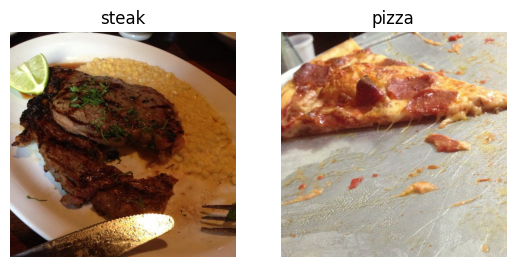

In [ ]:
# visualize data
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

### 2. preprocess the data (prepare it for a model)

In [ ]:
# define directory dataset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

our next step is to turn our data into **batches**.

a barch is a small subset of data. rather than look at all 10000 images at one time, a model might on ly look at 32 at a time.

it does this for a couple of reasons
1. 1000 images (or more) might not fit into the memory of your processor (GPU).
2. trying to learn the patterns in 10000 images in one hit could result in the model not being able to learn very well.

why 32?

because 32 is good for your health... https://twitter.com/ylecun/status/989610208497360896?lang=es


In [ ]:
# create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
# load in our image dat from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir, # target directory of images
                                               target_size=(224, 224), # target size of images (height, width)
                                               class_mode="binary", # type of data you're working with
                                               batch_size=32) # size of minibatches to load data into

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                            target_size=(224, 224),
                                            class_mode="binary",
                                            batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# get a sample of a train data batch
images, labels = train_data.next() # get the next batch of images/labels in train_data
len(images), len(labels)

(32, 32)

In [ ]:
# how many batchse are there
len(train_data)

47

In [ ]:
round(1500/32)

47

In [ ]:
# get the first two images
images[:2], images.shape

(array([[[[0.4039216 , 0.35686275, 0.35686275],
          [0.38823533, 0.34901962, 0.3529412 ],
          [0.37647063, 0.34117648, 0.36078432],
          ...,
          [0.43529415, 0.29803923, 0.28235295],
          [0.40784317, 0.3019608 , 0.27450982],
          [0.3803922 , 0.3019608 , 0.26666668]],
 
         [[0.44705886, 0.3372549 , 0.2901961 ],
          [0.48627454, 0.3803922 , 0.34509805],
          [0.43529415, 0.3529412 , 0.33333334],
          ...,
          [0.60784316, 0.46274513, 0.427451  ],
          [0.60784316, 0.43921572, 0.4156863 ],
          [0.60784316, 0.41960788, 0.41176474]],
 
         [[0.40000004, 0.2392157 , 0.15294118],
          [0.6313726 , 0.48627454, 0.41176474],
          [0.6039216 , 0.47450984, 0.4156863 ],
          ...,
          [0.70980394, 0.5019608 , 0.4784314 ],
          [0.69803923, 0.4784314 , 0.47450984],
          [0.68235296, 0.46274513, 0.4666667 ]],
 
         ...,
 
         [[0.3254902 , 0.23529413, 0.17254902],
          [0.30588

In [ ]:
images[7].shape

(224, 224, 3)

In [ ]:
# view the first batch of labels
labels

array([1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0.,
       1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0.],
      dtype=float32)

### 3. create a CNN model (start with a baseline)

a baseline is a relatively simple model or existing result that you setup when beginning a machine learning experiment and then as you keep experimenting, you try to beat the baseline

**Note:** in deep learning, there is almost an infinite amount of architectures you could create. So one of the best ways to get started is to start with something simple and see if it works on your data and then introduce complexity as required (e.g look at which current model is performig best in the field for your problem)

In [ ]:
# make th ecreating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
# create the model (this will be our baseline, a layer convolutional neural network)
model_4 = Sequential([
    Conv2D(filters=10, # filter is the number of sliding windows going across an input (higher = more complex model)
           kernel_size=(3, 3), # size of the sliding window going across an input
           strides=(1, 1), # the size of the step the sliding window takes across an input
           padding="valid", # if "same", output shape si same as input shape, if "valid" output shape gets compressed
           activation="relu",
           input_shape=(224, 224, 3)), # input layer (specify input shape)
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid") # output layer (working with binary classification so only 1 output neuron)
])

**practice:** understand what's going on in a conv2d layer by going through the cnnn explainer website for 10-20 minutes

In [ ]:
# compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [ ]:
# get a summary of our model
model_4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_4 (Flatten)         (None, 475240)            0         
                                                                 
 dense_14 (Dense)            (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


### 4. fit the model

In [ ]:
# check the loengts of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [ ]:
# fit the model
history_4 = model_4.fit(train_data, # this is a combination of labels and sample data
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data),
                        )

Epoch 1/5
47/47 [==============================] - 91s 2s/step - loss: 2.1047 - accuracy: 0.6660 - val_loss: 0.4478 - val_accuracy: 0.8000
Epoch 2/5
47/47 [==============================] - 88s 2s/step - loss: 0.4266 - accuracy: 0.8067 - val_loss: 0.3740 - val_accuracy: 0.8460
Epoch 3/5
47/47 [==============================] - 90s 2s/step - loss: 0.3420 - accuracy: 0.8607 - val_loss: 0.3962 - val_accuracy: 0.8140
Epoch 4/5
47/47 [==============================] - 92s 2s/step - loss: 0.2495 - accuracy: 0.9100 - val_loss: 0.3901 - val_accuracy: 0.8400
Epoch 5/5
47/47 [==============================] - 89s 2s/step - loss: 0.1621 - accuracy: 0.9493 - val_loss: 0.4875 - val_accuracy: 0.7840


### 5. evaluating our model

it looks like our model is learning something, let's evaluate it

<Axes: >

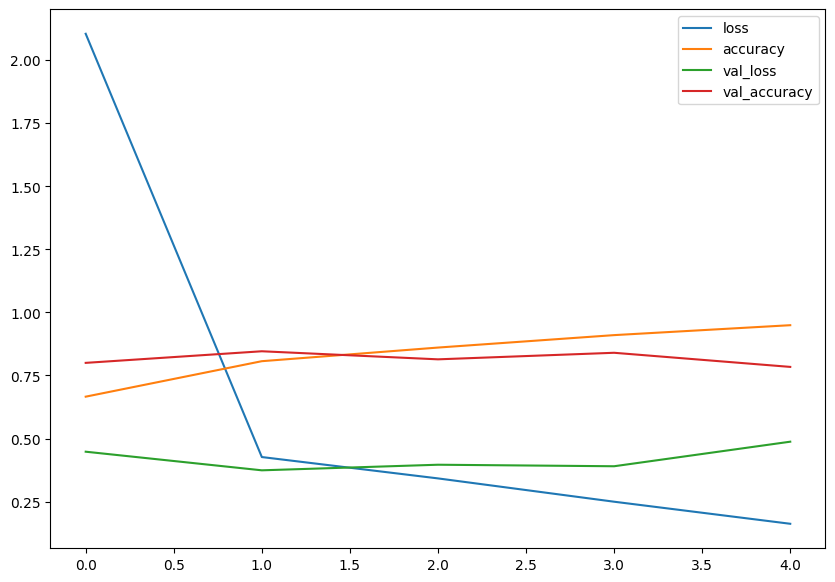

In [ ]:
# let's plot the training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7))

In [ ]:
# plot the validation and training curves separetely
def plot_loss_curves(history):
  """
  return separate loss curves for training and validation metrics.,
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"])) # how many epochs did we run

  # plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.ylabel("loss")
  plt.legend()

  # plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.ylabel("accuracy")
  plt.legend()

**Note:** when a model's **validation loss starts to increase**, it's likely that the model is **overfitting** the training dataset. this means, it's learning the patterns in the training dataset *too well* and thus the model's ability to generalize to unseen data will be diminished.

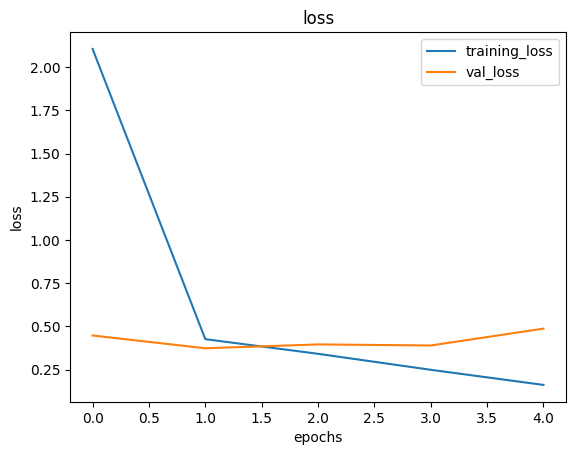

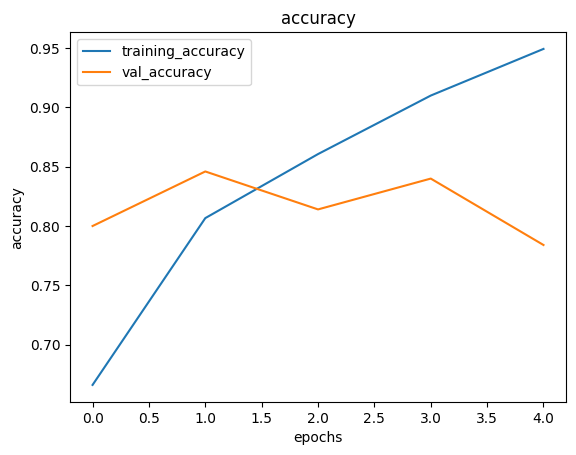

In [ ]:
# check out the loss and accuracy of model_4
plot_loss_curves(history_4)

**Note:** ideally the two loss curves (training and validation) will be very similar to each other (decreasing at similar rates), when there are large differences your model may be **overfitting**

### 6. adjust the model parameters

fitting a machine learning model comes in 3 steps:

0. create a baseline
1. beat the baseline by overfitting a larger model
2. reduce overfitting

ways to induce overfitting:

* increase the number of conv layers
* increase the numbe of conv filters
* add another dense layer to the output of our flattened layer

reduce overfitting:
* add data augmentation
* add regularization layers (such as maxpool2d)
* add more data...

**Note:** reducing overfitting is also known as **regularization**

In [ ]:
# create the model (this is going to be our new baseline)
model_5 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

In [ ]:
# compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [ ]:
# fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 39s 822ms/step - loss: 0.6011 - accuracy: 0.6727 - val_loss: 0.4687 - val_accuracy: 0.7920
Epoch 2/5
47/47 [==============================] - 38s 802ms/step - loss: 0.4763 - accuracy: 0.7713 - val_loss: 0.3892 - val_accuracy: 0.8340
Epoch 3/5
47/47 [==============================] - 38s 804ms/step - loss: 0.4230 - accuracy: 0.8180 - val_loss: 0.4021 - val_accuracy: 0.8200
Epoch 4/5
47/47 [==============================] - 38s 802ms/step - loss: 0.3945 - accuracy: 0.8340 - val_loss: 0.3291 - val_accuracy: 0.8540
Epoch 5/5
47/47 [==============================] - 38s 805ms/step - loss: 0.3747 - accuracy: 0.8447 - val_loss: 0.3101 - val_accuracy: 0.8660


In [ ]:
# get a summary of our model with max pooling
model_5.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

In [ ]:
model_4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_4 (Flatten)         (None, 475240)            0         
                                                                 
 dense_14 (Dense)            (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


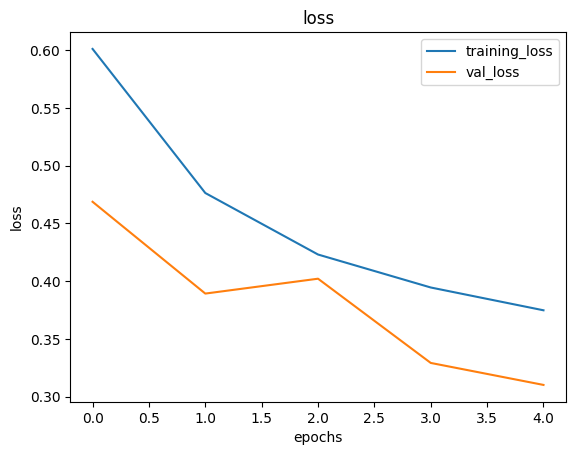

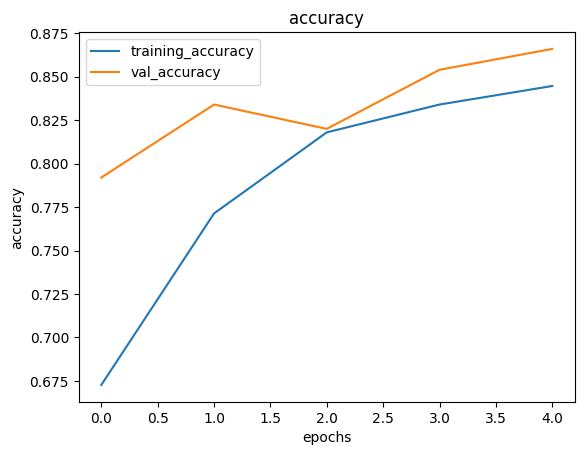

In [ ]:
# plot loss curves
plot_loss_curves(history_5)

### opening our bag of tricks and finding data augmentation

In [ ]:
# create imagedatagenerator traianing instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2, # how much do you want to rotate an image?
                                             shear_range=0.2, # how much do you want to shear an image?
                                             zoom_range=0.2, # zoom in randomly on an image
                                             width_shift_range=0.2, # move your image around on the x-axis
                                             height_shift_range=0.3, # move your image arouynd on the y-axis
                                             horizontal_flip=True) # do you want to flip an image?

# create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# create ImageDataGenerator without data augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)

**question:** what is data augmentation?

data augmentation si the process of altering our training data, leading it to have more diversity and in turn allowing our models to learn more generalizable (hopefully) patterns. altering might mean adjusting the rotation of an image, flipping it, cripping it ro something similar

let's write some code to visualize data augmentation...

In [ ]:
# import data and augment it from training directory
print("augmented training data: ")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   shuffle=False) # for demonstration purposes only

# create non augmented train data batches
print("non-augmented training data:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="binary",
                                               shuffle=False)

IMG_SIZE = (224, 224)
# create non-augmented teste data batches
print("non-augmented teset data:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode="binary")

augmented training data: 
Found 1500 images belonging to 2 classes.
non-augmented training data:
Found 1500 images belonging to 2 classes.
non-augmented teset data:
Found 500 images belonging to 2 classes.


**Note:** data augmentation is usually only performed on the training data. using `ImageDataGenerator` built-in data augmentation parameters our images are left as they are in the directories bur are modified as they're loaded into the model

finally... let's visualize some augmented data

In [ ]:
# get sample data batches
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # note: labels aren't auygmented, only data images

showing image number: 8


(-0.5, 223.5, 223.5, -0.5)

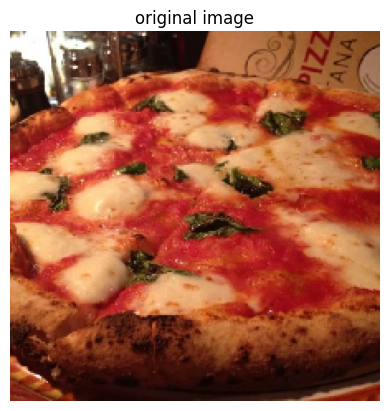

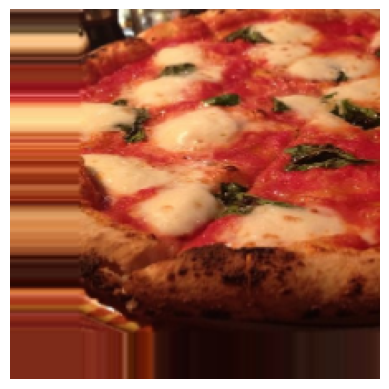

In [ ]:
# show the original image and augmented image
import random
random_number = random.randint(0, 32) # our batch sizes are 32...
print(f"showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title(f"original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.axis(False)

now we've seen what augmented training data looks like, let's build a model and see how it learns on augmented data

In [ ]:
# set random seed
tf.random.set_seed(42)

# create the model (same as model_5)
model_6 = Sequential([
    Conv2D(10, 3, input_shape=(224, 224, 3), activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

# compile the model
model_6.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=Adam(),
                metrics=["accuracy"])

# fit the model
history_6 = model_6.fit(train_data_augmented, # fitting model_6 on augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 53s 1s/step - loss: 0.7374 - accuracy: 0.4927 - val_loss: 0.6872 - val_accuracy: 0.5940
Epoch 2/5
47/47 [==============================] - 47s 990ms/step - loss: 0.6931 - accuracy: 0.4987 - val_loss: 0.6793 - val_accuracy: 0.5160
Epoch 3/5
47/47 [==============================] - 47s 998ms/step - loss: 0.6972 - accuracy: 0.4980 - val_loss: 0.6841 - val_accuracy: 0.5880
Epoch 4/5
47/47 [==============================] - 47s 1s/step - loss: 0.6879 - accuracy: 0.5700 - val_loss: 0.6556 - val_accuracy: 0.6700
Epoch 5/5
47/47 [==============================] - 47s 993ms/step - loss: 0.6731 - accuracy: 0.6273 - val_loss: 0.5837 - val_accuracy: 0.7260


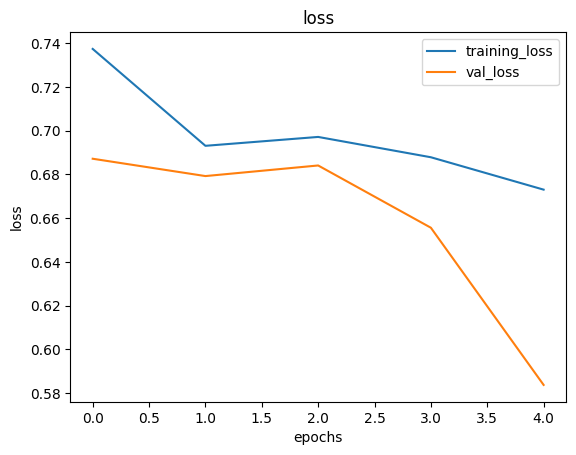

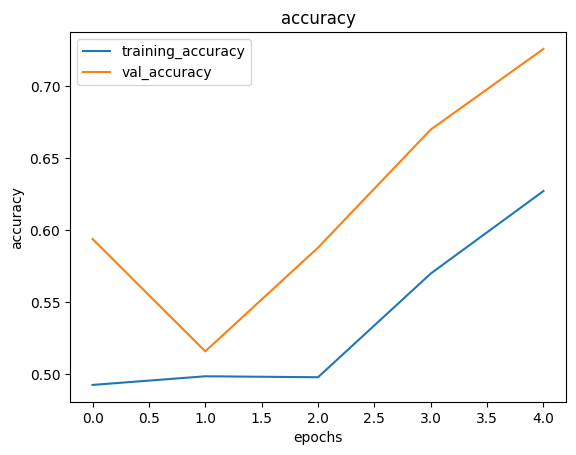

In [ ]:
# check our models training curves
plot_loss_curves(history_6)

let's shuffle our augmented training data and train another model (the same as before) on it and see what happens

In [ ]:
# import data, augment it and shuffle from training directory
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            class_mode="binary",
                                                                            batch_size=32,
                                                                            shuffle=True)

Found 1500 images belonging to 2 classes.


In [ ]:
# set ramdom seed
tf.random.set_seed(42)

# creathe the model (same as model_5 and model_6)
model_7 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

# compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# fit the model
history_7 = model_7.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled), # we're fitting on augmented and shuffled data now
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 53s 1s/step - loss: 0.6716 - accuracy: 0.5767 - val_loss: 0.5563 - val_accuracy: 0.7020
Epoch 2/5
47/47 [==============================] - 52s 1s/step - loss: 0.5729 - accuracy: 0.7033 - val_loss: 0.4207 - val_accuracy: 0.8220
Epoch 3/5
47/47 [==============================] - 47s 1s/step - loss: 0.5549 - accuracy: 0.7300 - val_loss: 0.4381 - val_accuracy: 0.8240
Epoch 4/5
47/47 [==============================] - 48s 1s/step - loss: 0.5384 - accuracy: 0.7513 - val_loss: 0.5137 - val_accuracy: 0.7400
Epoch 5/5
47/47 [==============================] - 47s 1s/step - loss: 0.5210 - accuracy: 0.7640 - val_loss: 0.3991 - val_accuracy: 0.8420


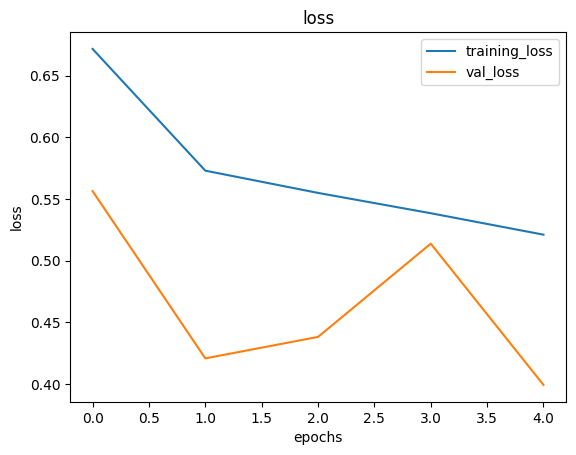

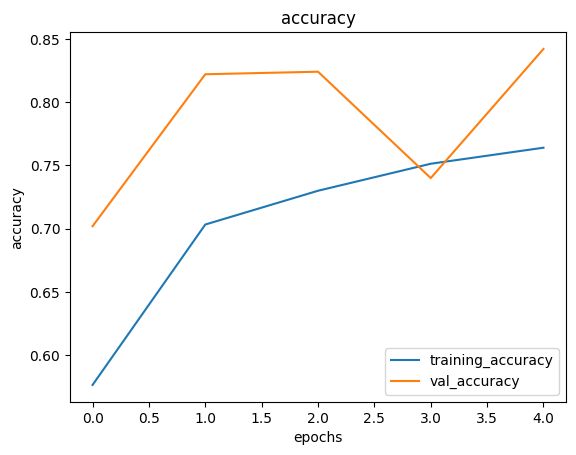

In [ ]:
# plot loss curves
plot_loss_curves(history_7)

**Note:** when shuffling training data, the model gts exposed to all different kinds of data during training, thus enabling it to learn features across a wide array of images (in our case, pizza & steak at the same time instead of just pizza then steak)

### 7. repeat until satisfied

since we've already beaten our baseline, there are a few tghings we could try to continue to improve out model:

* increase  the numbe of model layers (e.g add more `conv2D`/`MaxPool2D` layers)
* increase the number of filters in each convolutional layer (e.g from 10 to 32 or even 64)
* train for longer (more epochs)
* find an ideal learning rate
* get more data (give the model more opportunities to learn)
* use **transfer learning** to leverage what another image model has learn and adjust it for our own use case

> **practice:** recreate the model on the CNN explainer website (same as `model_1` and see how it performs on the augmented shuffled training data.


In [ ]:
# set random seed
tf.random.set_seed(42)

# create the model
model_8 = Sequential([
    Conv2D(32, 3, activation="relu", input_shape=(224, 224, 3)),
    Conv2D(32, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(32, 3, activation="relu"),
    Conv2D(32, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

# compile the model
model_8.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# fit the model
history_8 = model_8.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 204s 4s/step - loss: 0.6424 - accuracy: 0.6427 - val_loss: 0.5758 - val_accuracy: 0.6460
Epoch 2/5
47/47 [==============================] - 201s 4s/step - loss: 0.5108 - accuracy: 0.7513 - val_loss: 0.3423 - val_accuracy: 0.8760
Epoch 3/5
47/47 [==============================] - 203s 4s/step - loss: 0.4724 - accuracy: 0.7887 - val_loss: 0.2967 - val_accuracy: 0.8680
Epoch 4/5
47/47 [==============================] - 202s 4s/step - loss: 0.4792 - accuracy: 0.7747 - val_loss: 0.3879 - val_accuracy: 0.8240
Epoch 5/5
47/47 [==============================] - 208s 4s/step - loss: 0.4654 - accuracy: 0.8073 - val_loss: 0.3249 - val_accuracy: 0.8700


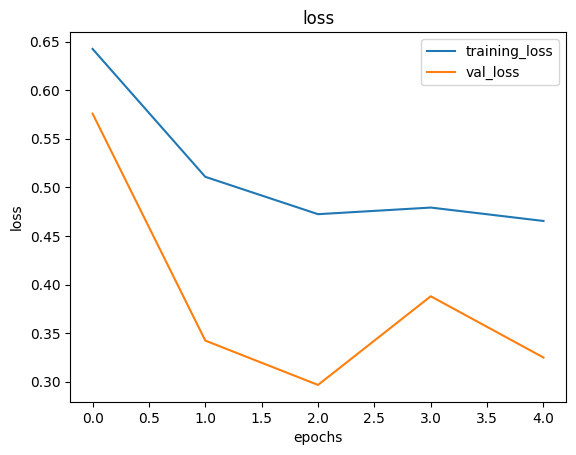

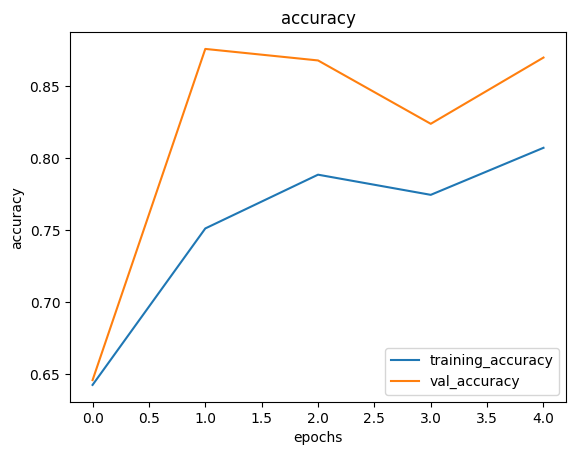

In [ ]:
plot_loss_curves(history_8)

## making a prediction with our trained model on our own custom data

In [ ]:
# classes we're working with
print(class_names)

['pizza' 'steak']


--2023-06-09 02:55:55--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.01s   

2023-06-09 02:55:55 (161 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



(-0.5, 3023.5, 4031.5, -0.5)

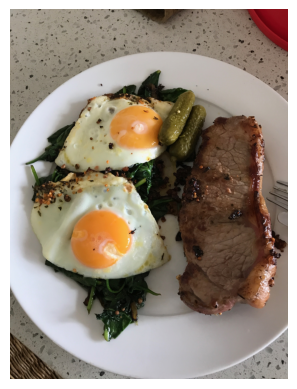

In [ ]:
# view our example image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False)

In [ ]:
# check the shape of our image
steak.shape

(4032, 3024, 3)

**Note:** when you train a neural network and you want to make a prediction with it on your own custon data, it's important than your custom data (or new data) is preprocessed into the same format as the data your model was trained on

In [ ]:
# create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  reads an image from filename, turns it into a tensor and reshapes it
  to (img_shape, img-shape, colour_shannels)
  """
  # read in the image
  img = tf.io.read_file(filename)
  # decode the read file into a tensor
  img = tf.image.decode_image(img)
  # resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])
  # rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [ ]:
# load in and preprocess our custom image
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [ ]:
pred = model_7.predict(tf.expand_dims(steak, axis=0))

1/1 [==============================] - 0s 100ms/step


looks like our custom image is being put through our model, however, it currently ouputs a prediction probability, wouldn't it be nice if we could visualize the image as well as the model's prediction?

In [ ]:
# remind ourselves of our class names
class_names

array(['pizza', 'steak'], dtype='<U5')

In [ ]:
# we can index the predicted class by rounding the prediction probability nad indexing it on the class names
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [ ]:
def pred_and_plot(model, filename, class_names=class_names):
  """
  imports an image located at filename, makes a predictoin with model
  and plots the image with the predicted class as the title.
  """
  # import the target image and preprocess it
  img = load_and_prep_image(filename)

  # make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # get the predicted class
  pred_class = class_names[int(tf.round(pred))]

  # plot the image and predicted class
  plt.imshow(img)
  plt.title(f"prediction: {pred_class}")
  plt.axis(False)

1/1 [==============================] - 0s 24ms/step


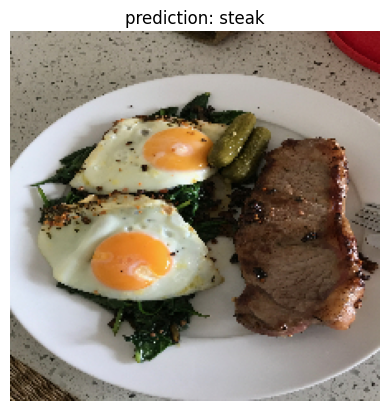

In [ ]:
# test our model on a custom image
pred_and_plot(model_7, "03-steak.jpeg")

our model works, let's try it on another image... this time pizza

--2023-06-09 02:55:58--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.02s   

2023-06-09 02:55:59 (179 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]

1/1 [==============================] - 0s 26ms/step


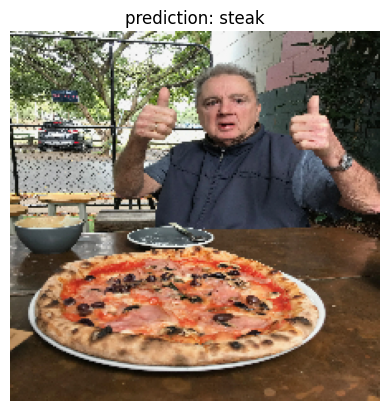

In [ ]:
# download another test custom image and make a prediction on it
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pred_and_plot(model_7, "03-pizza-dad.jpeg")

# multi-class image classification

we've just been through a bunch of the following steps with a binary classification problem (pizza vs steak), now we're going to step thing up a notch with 10 classes of food (multi-class calssification)

we've just been through a bunch of the following staeps with a binary classification problem (pizza vs. steak), now we're going to step things up a notch with 10 classes of food (multi-class classification)

1. become one with the data
2. preprocess the data (get it ready for a model)
3. create a model (start with a baseline)
4. fit the model (overfit it to make sure it works)
5. evaluate the model
6. adjust different hyperparameteres and improve the model (tray to beat baseline/reduce overfitting)
7. repeat until satisfied

## 1. import and become one with the data

In [69]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# unzip our data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2023-06-13 20:47:37--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 74.125.195.128, 172.253.117.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  73.4MB/s    in 8.4s    

2023-06-13 20:47:46 (58.7 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
import os

# walk through 10 classes of food image data
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"there are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

there are 2 directories and 0 images in '10_food_classes_all_data'
there are 10 directories and 0 images in '10_food_classes_all_data/test'
there are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'
there are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'
there are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'
there are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'
there are 0 directories and 250 images in '10_food_classes_all_data/test/steak'
there are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'
there are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'
there are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'
there are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'
there are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'
there are 10 directori

In [ ]:
!ls

10_food_classes_all_data  10_food_classes_all_data.zip	__MACOSX  sample_data


In [ ]:
# setup the train and test directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [ ]:
# let's get the claass names
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names, type(class_names)


(array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
        'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
       dtype='<U14'),
 numpy.ndarray)

['901660.jpg']
image shape: (512, 512, 3)


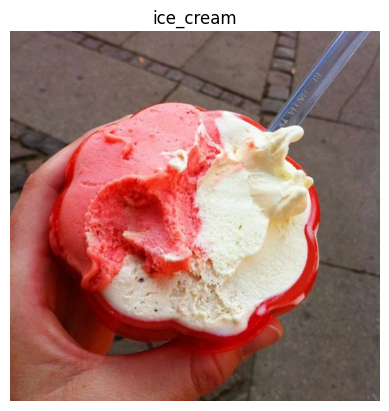

In [ ]:
# visualize, visualize, visualize
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

### 2. preprocess the data (prepare it for a model)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# rescale

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                                   target_size=(224, 224),
                                                   class_mode="categorical",
                                                   batch_size=32,
                                                   shuffle=True)

test_data = test_datagen.flow_from_directory(test_dir,
                                                 target_size=(224, 224),
                                                 class_mode="categorical",
                                                 batch_size=32,
                                                 shuffle=True)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### 3. create a model (start with a baseline)

we've talking a lot a bout the CNN explainer website... how about we just take their model (also on 10 classes) and use it for our problem

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation

# create our model (very similar to previous models but actually the same as CNN explainer website)
model_8 = Sequential([
    Conv2D(10, 3, input_shape=(224, 224, 3)),
    Activation(activation="relu"),
    Conv2D(10, 3),
    Activation(activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3),
    Activation(activation="relu"),
    Conv2D(10, 3),
    Activation(activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10), # changed to have 10 output neurons and use the softmax acitvation function
    Activation(activation="softmax")
])

# compile the model
model_8.compile(loss=tf.keras.losses.categorical_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

### 4. fit a model

In [ ]:
# fit the model
history_8 = model_8.fit(train_data, # now 10 different classes
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 65s 231ms/step - loss: 2.2011 - accuracy: 0.1903 - val_loss: 2.0542 - val_accuracy: 0.2472
Epoch 2/5
235/235 [==============================] - 69s 294ms/step - loss: 1.9873 - accuracy: 0.2980 - val_loss: 1.9360 - val_accuracy: 0.3200
Epoch 3/5
235/235 [==============================] - 55s 233ms/step - loss: 1.7698 - accuracy: 0.3965 - val_loss: 1.8479 - val_accuracy: 0.3568
Epoch 4/5
235/235 [==============================] - 53s 224ms/step - loss: 1.3806 - accuracy: 0.5380 - val_loss: 1.9667 - val_accuracy: 0.3500
Epoch 5/5
235/235 [==============================] - 55s 233ms/step - loss: 0.8369 - accuracy: 0.7248 - val_loss: 2.5934 - val_accuracy: 0.3180


### 5. evaluate the model

In [ ]:
model_8.evaluate(test_data)

79/79 [==============================] - 13s 164ms/step - loss: 2.5934 - accuracy: 0.3180


[2.593446969985962, 0.3179999887943268]

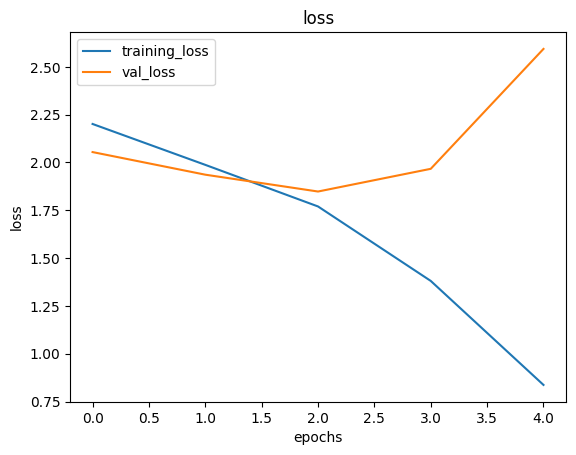

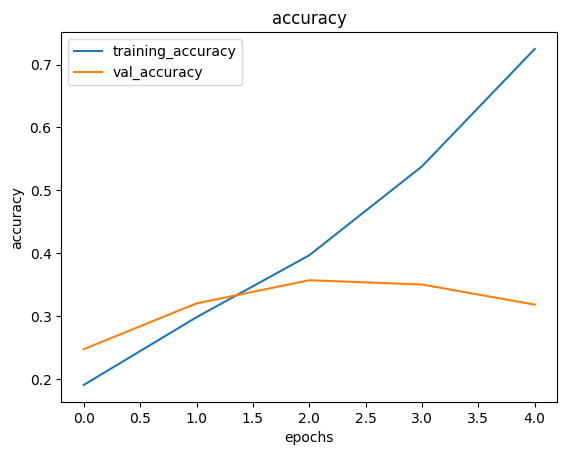

In [ ]:
# check out the model's loss curves on the 10 classes
plot_loss_curves(history_8)

what do these loss curves tell us?

well... is seems our model is **overfitting** the training set quite badly... in other words, it's getting great results on the training data but fails to generalize well to unseen data adn performs poorly on the test dataset.

### 6. adjust the model hyuperparameters (to beat the baseline/reduce overfitting)

Due to its performance on the training, data, it's clear our model is learning something...

however, it's not generalizing well to unseen data (overfitting).

so, let's try and fix overfitting by...

* **get more data** - having more dta gives a model more opportunity to learn diverese patterns...
* **simplify the model*** - if our current model is overfitting the data, it may be too complicated of a model, one way to simplify a model is to: reduce # of layers or reduce # of hidden units in layers
* **use data augmentation** - data augmentation maminpulates the training data in such a way to add more diversity to it (without altering the original data)
* **use transfer learning** - transfer learning leverages the patterns another model has learned on similar data to your ownand allows you to use those patterns on your own dataset

In [ ]:
model_8.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 activation (Activation)     (None, 222, 222, 10)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 activation_1 (Activation)   (None, 220, 220, 10)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                        

In [ ]:
# how about we try and simplify the model first?
# let's try to remove 2 convolutional layers...

# create the model
model_9 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax")
])

# compile the model
model_9.compile(loss=tf.keras.losses.categorical_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
# fit the model with 2x conv layers removed
history_9 = model_9.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 52s 215ms/step - loss: 2.2314 - accuracy: 0.1769 - val_loss: 1.9810 - val_accuracy: 0.2992
Epoch 2/5
235/235 [==============================] - 51s 218ms/step - loss: 1.8889 - accuracy: 0.3561 - val_loss: 1.9406 - val_accuracy: 0.3208
Epoch 3/5
235/235 [==============================] - 51s 217ms/step - loss: 1.6354 - accuracy: 0.4496 - val_loss: 1.9043 - val_accuracy: 0.3444
Epoch 4/5
235/235 [==============================] - 59s 251ms/step - loss: 1.2395 - accuracy: 0.5999 - val_loss: 1.9885 - val_accuracy: 0.3340
Epoch 5/5
235/235 [==============================] - 60s 256ms/step - loss: 0.7592 - accuracy: 0.7768 - val_loss: 2.3974 - val_accuracy: 0.3176


In [ ]:
model_9.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 29160)             0         
                                                                 
 dense_1 (Dense)             (None, 10)               

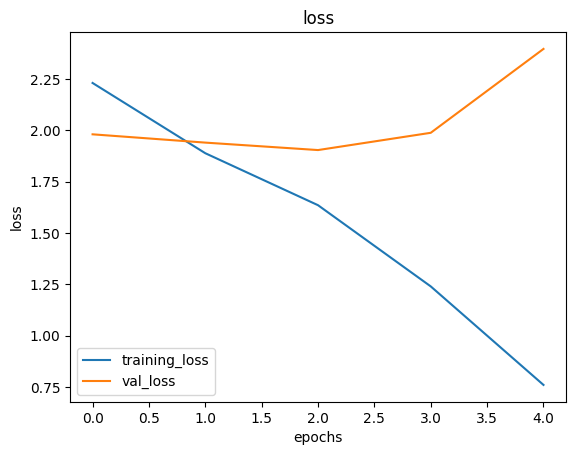

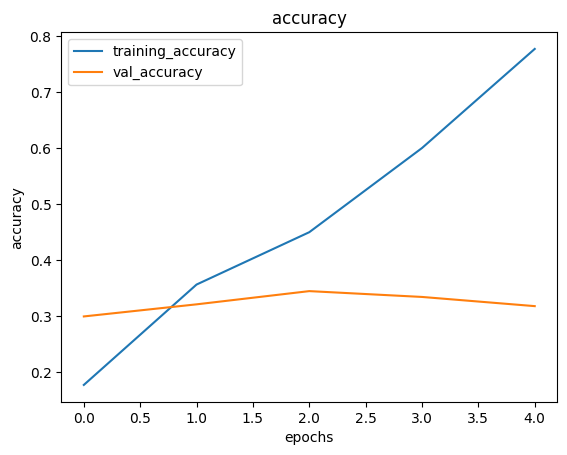

In [ ]:
# check out the loss curves of model_9
plot_loss_curves(history_9)

In [ ]:
model_9.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 29160)             0         
                                                                 
 dense_1 (Dense)             (None, 10)               

In [ ]:
model_8.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 activation (Activation)     (None, 222, 222, 10)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 activation_1 (Activation)   (None, 220, 220, 10)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                        

looks like our *simplifying the model* experiment didn't work... the accuracy went down and overfitting continued...

hoy about we tray data augmentation?

### trying to reduce overfitting with data augmentation

let's try and improve our model's results by uysing augmented training data...

ideally, we want to:
* reduce overfitting (get the train and validation loss curves closer)
* improve validation accuracy

In [ ]:
# create an augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             zoom_range=0.2,
                                             rotation_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode="categorical",
                                                                   shuffle=True)

Found 7500 images belonging to 10 classes.


In [ ]:
# let's create anoteher model ut this time we'll fit it on the augmented training data of 10 classes
model_10 = tf.keras.models.clone_model(model_8)

# compile the cloned model (using the same setup as previous models)
model_10.compile(loss=tf.keras.losses.categorical_crossentropy,
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

In [ ]:
model_10.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 activation (Activation)     (None, 222, 222, 10)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 activation_1 (Activation)   (None, 220, 220, 10)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                        

In [ ]:
# fit the model
history_10 = model_10.fit(train_data_augmented,
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 134s 563ms/step - loss: 2.2086 - accuracy: 0.1692 - val_loss: 2.0651 - val_accuracy: 0.2504
Epoch 2/5
235/235 [==============================] - 135s 575ms/step - loss: 2.0607 - accuracy: 0.2705 - val_loss: 1.9439 - val_accuracy: 0.3068
Epoch 3/5
235/235 [==============================] - 127s 540ms/step - loss: 1.9912 - accuracy: 0.2983 - val_loss: 1.8767 - val_accuracy: 0.3596
Epoch 4/5
235/235 [==============================] - 135s 574ms/step - loss: 1.9291 - accuracy: 0.3253 - val_loss: 1.7347 - val_accuracy: 0.4296
Epoch 5/5
235/235 [==============================] - 125s 533ms/step - loss: 1.8964 - accuracy: 0.3409 - val_loss: 1.7721 - val_accuracy: 0.3996


In [ ]:
model_8.evaluate(test_data)

79/79 [==============================] - 13s 159ms/step - loss: 2.5934 - accuracy: 0.3180


[2.593447208404541, 0.3179999887943268]

In [ ]:
model_10.evaluate(test_data)

79/79 [==============================] - 13s 160ms/step - loss: 1.7721 - accuracy: 0.3996


[1.7720998525619507, 0.39959999918937683]

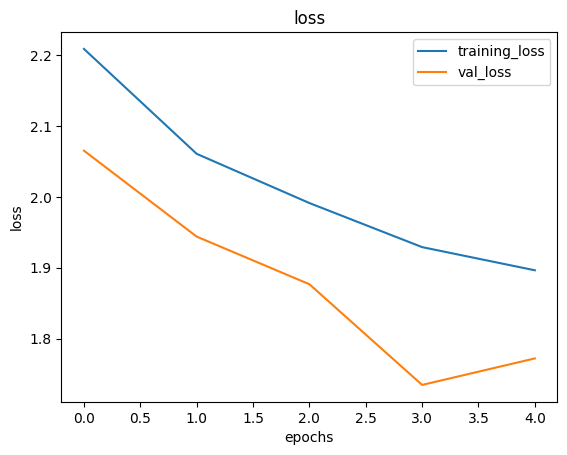

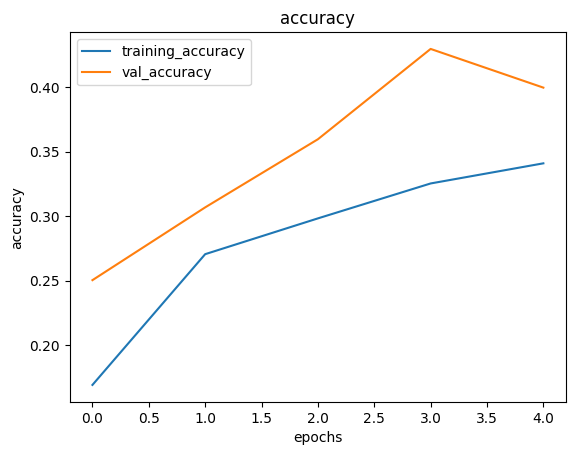

In [ ]:
# check out our model trained on augmented data's loss curves
plot_loss_curves(history_10)

that looks much better, the loss curves are much closer to each other than the baseline model and they look like they're headin in the right direction (certainly not the wrong direction) so if we were to train for longer, we might see further improvements.

### 7. repeat until satisfied

we could keep going here... countinually trying to bring our loss curves closer together and trying to improve the validation/test accuracy.

how?

by running lots of experiments, namely:
- restructuring our model's architecture (increasing layers/hidden units)
- adjust the learning rate
- try different methods of data augmentation (adjust the hyperparameters in our ImageDataGenerator instance)
- training fo rlong (e.g. 10 epochs instead of 5 epochs)
- try **transfer learning**

### making a prediction with our trained model

let's use our trained model to make some predictions on our own custom images!

In [ ]:
# remind ourselves of the classes our model is trained on
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [ ]:
# download some custom images
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg

--2023-06-09 21:41:39--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg.2’

03-pizza-dad.jpeg.2 100%[===================>]   2.74M  --.-KB/s    in 0.03s   

2023-06-09 21:41:39 (93.1 MB/s) - ‘03-pizza-dad.jpeg.2’ saved [2874848/2874848]

--2023-06-09 21:41:39--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awai

In [ ]:
# reconfig pred_and_plot function to work with multiclass images
def pred_and_plot(model, filename, class_names=class_names):
  """
  imports an image located at filename, makes a predictoin with model
  and plots the image with the predicted class as the title.
  """
  # import the target image and preprocess it
  img = load_and_prep_image(filename)

  # make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # add in logic for multi-class and get pred_class name
  if len(pred[0]) > 1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int(tf.round(pred))]

  # plot the image and predicted class
  plt.imshow(img)
  plt.title(f"prediction: {pred_class}")
  plt.axis(False)

1/1 [==============================] - 0s 18ms/step


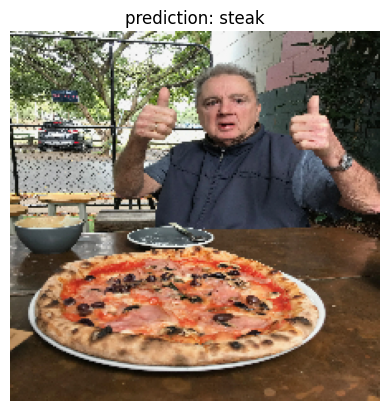

In [ ]:
# make a prediction using model_10
pred_and_plot(model=model_10,
              filename="03-pizza-dad.jpeg",
              class_names=class_names)

1/1 [==============================] - 0s 32ms/step


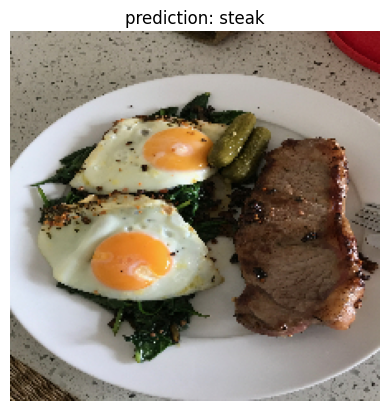

In [ ]:
# make a prediction using model_10
pred_and_plot(model=model_10,
              filename="03-steak.jpeg",
              class_names=class_names)

1/1 [==============================] - 0s 32ms/step


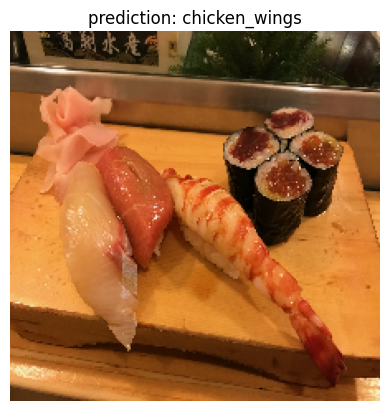

In [ ]:
pred_and_plot(model=model_10,
              filename="03-sushi.jpeg",
              class_names=class_names)

1/1 [==============================] - 0s 19ms/step


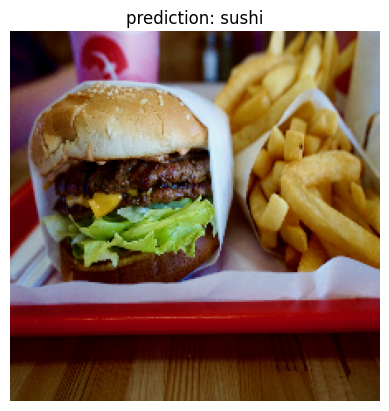

In [ ]:
pred_and_plot(model=model_10,
              filename="03-hamburger.jpeg",
              class_names=class_names)

Looks like our model didn't perform very well on our custom images but this is beacause it only achieved -39% accuracy on the test data. so we can expect it to function quite poorly on other unseen data

In [ ]:
# good news: our updated pred_and_plot function works for binary classification too...
pred_and_plot(model=model_3,
              filename="02-steak.jpeg",
              class_names=["pizza", "steak"])

### saving and loading our model

In [ ]:
# save a model
model_10.save("saved_trained_model_10")

In [ ]:
# load in a trained model and evaluate it
loaded_model_10 = tf.keras.models.load_model("saved_trained_model_10")
loaded_model_10.evaluate(test_data)

79/79 [==============================] - 16s 199ms/step - loss: 1.7721 - accuracy: 0.3996


[1.7720990180969238, 0.39959999918937683]

In [ ]:
# compare our model to our existing model
model_10.evaluate(test_data)

79/79 [==============================] - 13s 166ms/step - loss: 1.7721 - accuracy: 0.3996


[1.7720993757247925, 0.39959999918937683]

In [ ]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen_homework = ImageDataGenerator(rescale=1/255.,
                                            rotation_range=0.2,
                                            width_shift_range=0.2,
                                            height_shift_range=0.2,
                                            zoom_range=0.2,
                                            vertical_flip=True,
                                            horizontal_flip=True)
test_datagen_homework = ImageDataGenerator(rescale=1/255.)

In [ ]:
train_data_homework = train_datagen_homework.flow_from_directory(directory=train_dir,
                                                                 target_size=(224, 224))
test_data_homework = test_datagen_homework.flow_from_directory(directory=test_dir,
                                                              target_size=(224, 224))

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [ ]:
import os
dirs = os.listdir(train_dir+"/pizza")
dirs[:10]

['259449.jpg',
 '1968947.jpg',
 '168879.jpg',
 '2916034.jpg',
 '34632.jpg',
 '413789.jpg',
 '1877103.jpg',
 '3398309.jpg',
 '3479936.jpg',
 '419516.jpg']

In [ ]:
import random
random.sample(dirs[:10], 1)

['168879.jpg']

In [ ]:
random_image = random.sample(dirs, 1)
random_image

['866834.jpg']

(-0.5, 511.5, 510.5, -0.5)

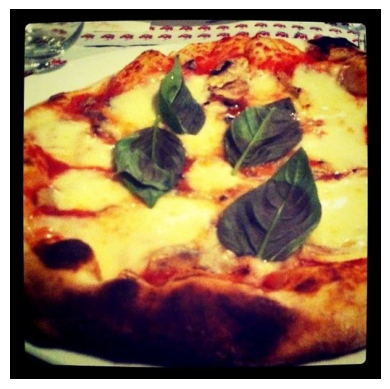

In [ ]:
import matplotlib.image as mpimg

img = mpimg.imread(train_dir+"/pizza/"+random_image[0])
plt.imshow(img)
plt.axis("off")

In [ ]:
def plot_random_image(target_dir, target_class):
  """
  practice plotting a random image from a given dataset
  """
  # image's path
  image_path = target_dir+target_class+"/"

  # create a list of all images inside the image path
  images = os.listdir(image_path)

  # select a random image from images
  random_image = random.sample(images, 1)

  # get image from the path
  img = mpimg.imread(image_path+random_image[0])

  # show image
  plt.imshow(img)
  plt.axis("off")
  plt.title(target_class)

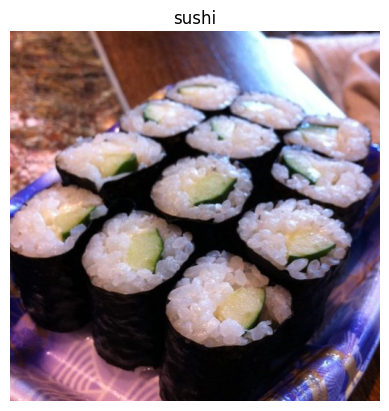

In [ ]:
plot_random_image(target_dir=train_dir, target_class="sushi")

# Exercises

## 1.

### import data

In [ ]:
!pip install rarfile

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import rarfile

In [ ]:
filepath = "/content/mouse_almohadon.rar"
with rarfile.RarFile(filepath) as rar_file:
  rar_file.extractall("mouse_almohadon")

In [ ]:
import os
for dirpath, dirnames, filenames in os.walk("mouse_almohadon"):
  print(f"there are {len(dirnames)} folders and {len(filenames)} images in {dirpath}")

there are 1 folders and 0 images in mouse_almohadon
there are 2 folders and 0 images in mouse_almohadon/mouse_almohadon
there are 0 folders and 6 images in mouse_almohadon/mouse_almohadon/mouse
there are 0 folders and 6 images in mouse_almohadon/mouse_almohadon/almohadon


In [ ]:
images = os.listdir("mouse_almohadon/mouse_almohadon/almohadon")
images

['WhatsApp Image 2023-06-13 at 15.47.39 (1).jpeg',
 'WhatsApp Image 2023-06-13 at 15.47.38 (3).jpeg',
 'WhatsApp Image 2023-06-13 at 15.47.38 (2).jpeg',
 'WhatsApp Image 2023-06-13 at 15.47.40.jpeg',
 'WhatsApp Image 2023-06-13 at 15.47.39 (2).jpeg',
 'WhatsApp Image 2023-06-13 at 15.47.39.jpeg']

### view data

In [34]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def show_image(dirpath, dir):
  image_path = dirpath + "/" + dir

  images = os.listdir(image_path)
  random_image = random.sample(images, 1)

  print(random_image[0])

  img = mpimg.imread(image_path+"/"+random_image[0])
  plt.imshow(img)
  plt.title(dir)
  plt.axis("off")

  print(f"image shape: {img.shape}")

  return img

WhatsApp Image 2023-06-13 at 15.47.39 (2).jpeg
image shape: (1280, 960, 3)


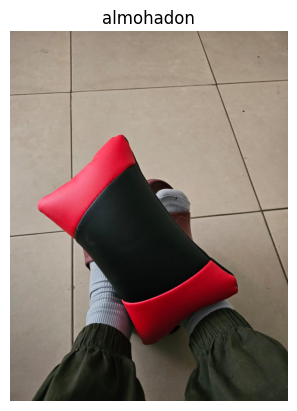

In [35]:
dirpath = "mouse_almohadon/mouse_almohadon"
dir = "almohadon"
img = show_image(dirpath=dirpath, dir=dir)

In [36]:
tf.constant(img)

<tf.Tensor: shape=(1280, 960, 3), dtype=uint8, numpy=
array([[[146, 130, 117],
        [146, 130, 117],
        [147, 131, 118],
        ...,
        [128, 112,  96],
        [128, 112,  96],
        [128, 112,  96]],

       [[146, 130, 117],
        [146, 130, 117],
        [147, 131, 118],
        ...,
        [128, 112,  96],
        [128, 112,  96],
        [128, 112,  96]],

       [[146, 130, 117],
        [146, 130, 117],
        [147, 131, 118],
        ...,
        [129, 113,  97],
        [128, 112,  96],
        [128, 112,  96]],

       ...,

       [[107,  97,  87],
        [106,  96,  86],
        [108,  98,  88],
        ...,
        [ 35,  43,  32],
        [ 37,  45,  34],
        [ 38,  46,  35]],

       [[107,  97,  87],
        [106,  96,  86],
        [109,  99,  89],
        ...,
        [ 34,  42,  31],
        [ 34,  42,  31],
        [ 34,  42,  31]],

       [[108,  98,  88],
        [107,  97,  87],
        [110, 100,  90],
        ...,
        [ 33,  41,  

### Preprocess images

In [43]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1/255,
                                   rotation_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   vertical_flip=True)

In [45]:
data = train_datagen.flow_from_directory(directory=dirpath,
                                                    target_size=(256, 256),
                                                    class_mode="binary")

Found 12 images belonging to 2 classes.


In [46]:
len(data)

1

### create, compile and fit the mdoel

In [54]:
# create the model
model_exercise = tf.keras.Sequential([
    tf.keras.layers.Conv2D(5, 3, input_shape=(256, 256, 3), activation=tf.keras.activations.relu),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(5, 3, activation=tf.keras.activations.relu),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

model_exercise.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                       optimizer=tf.keras.optimizers.Adam(),
                       metrics=["accuracy"])

history_exercise = model_exercise.fit(data,
                                      epochs=10,
                                      steps_per_epoch=len(data))

Epoch 1/10
1/1 [==============================] - 11s 11s/step - loss: 0.6775 - accuracy: 0.6667
Epoch 2/10
1/1 [==============================] - 0s 372ms/step - loss: 0.6597 - accuracy: 0.6667
Epoch 3/10
1/1 [==============================] - 1s 506ms/step - loss: 0.5623 - accuracy: 0.5833
Epoch 4/10
1/1 [==============================] - 1s 606ms/step - loss: 0.4505 - accuracy: 0.8333
Epoch 5/10
1/1 [==============================] - 1s 619ms/step - loss: 0.4575 - accuracy: 0.7500
Epoch 6/10
1/1 [==============================] - 1s 563ms/step - loss: 0.3821 - accuracy: 0.9167
Epoch 7/10
1/1 [==============================] - 0s 368ms/step - loss: 0.3937 - accuracy: 0.8333
Epoch 8/10
1/1 [==============================] - 0s 351ms/step - loss: 0.2610 - accuracy: 0.9167
Epoch 9/10
1/1 [==============================] - 0s 358ms/step - loss: 0.1427 - accuracy: 1.0000
Epoch 10/10
1/1 [==============================] - 0s 359ms/step - loss: 0.1558 - accuracy: 1.0000


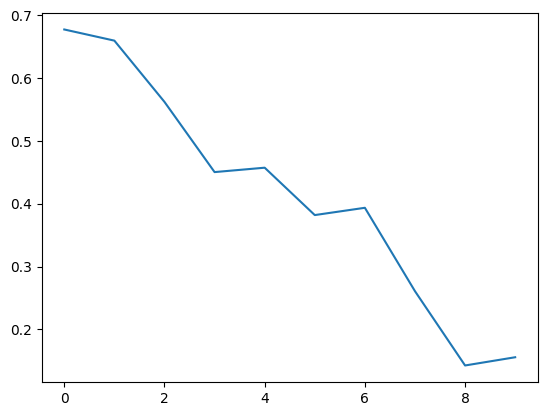

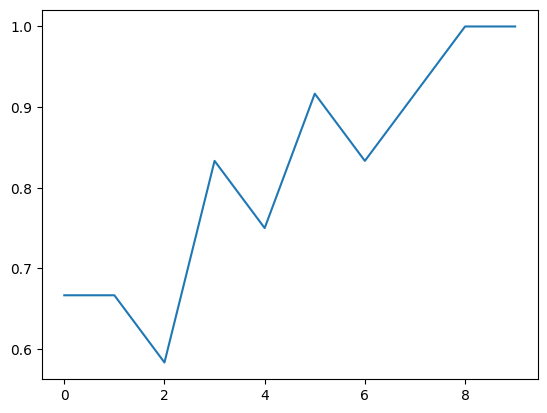

In [57]:
plt.plot(range(len(history_exercise.history["loss"])), history_exercise.history["loss"], label="loss")
plt.figure()
plt.plot(range(len(history_exercise.history["loss"])), history_exercise.history["accuracy"], label="accuracy")

(-0.5, 959.5, 1279.5, -0.5)

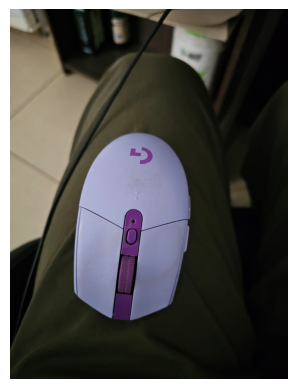

In [59]:
img_test = mpimg.imread("/content/mouse_almohadon/mouse_almohadon/mouse/WhatsApp Image 2023-06-13 at 15.47.37 (2).jpeg")
plt.imshow(img_test)
plt.axis("off")

### making a prediction

In [61]:
img = tf.io.read_file("/content/mouse_almohadon/mouse_almohadon/mouse/WhatsApp Image 2023-06-13 at 15.47.37 (2).jpeg")
img = tf.image.decode_image(img)
img = tf.image.resize(img, size=(256, 256))
img = img/255

In [62]:
pred = model_exercise.predict(tf.expand_dims(img, axis=0))

1/1 [==============================] - 0s 119ms/step


In [63]:
pred

array([[0.9954053]], dtype=float32)

In [64]:
data.classes

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1], dtype=int32)

In [66]:
from pathlib import Path
data_dir = Path("/content/mouse_almohadon/mouse_almohadon")
class_names = np.array(sorted(item.name for item in data_dir.glob("*")))
class_names

array(['almohadon', 'mouse'], dtype='<U9')

In [68]:
class_names[int(tf.round(pred))]

'mouse'

## 4.

In [92]:
train_dir = "/content/10_food_classes_all_data/train"
test_dir = "/content/10_food_classes_all_data/test"

In [93]:
train_datagen_augmented = ImageDataGenerator(rescale=1./255,
                                             zoom_range=0.2,
                                             rotation_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [94]:
train_data_augmented = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               shuffle=True,
                                               class_mode="categorical")

test_data = train_datagen.flow_from_directory(directory=test_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               shuffle=True,
                                               class_mode="categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [95]:
# create the model
model_exercise_2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, 3, input_shape=(224, 224, 3), activation=tf.keras.activations.relu),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(32, 3, activation=tf.keras.activations.relu),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(32, 3, activation=tf.keras.activations.relu),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation="softmax")
])

# compile the model
model_exercise_2.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                         optimizer=tf.keras.optimizers.Adam(),
                         metrics=["accuracy"])

# fit the model
history_exercise_2 = model_exercise_2.fit(train_data_augmented,
                                          epochs=5,
                                          steps_per_epoch=len(train_data_augmented),
                                          validation_data=test_data,
                                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 151s 637ms/step - loss: 2.2524 - accuracy: 0.1621 - val_loss: 2.1902 - val_accuracy: 0.1800
Epoch 2/5
235/235 [==============================] - 141s 602ms/step - loss: 2.1810 - accuracy: 0.1973 - val_loss: 2.1236 - val_accuracy: 0.2200
Epoch 3/5
235/235 [==============================] - 143s 610ms/step - loss: 2.1164 - accuracy: 0.2329 - val_loss: 2.1252 - val_accuracy: 0.2148
Epoch 4/5
235/235 [==============================] - 141s 602ms/step - loss: 2.0916 - accuracy: 0.2445 - val_loss: 2.0268 - val_accuracy: 0.2768
Epoch 5/5
235/235 [==============================] - 150s 639ms/step - loss: 2.0610 - accuracy: 0.2592 - val_loss: 2.0055 - val_accuracy: 0.2884


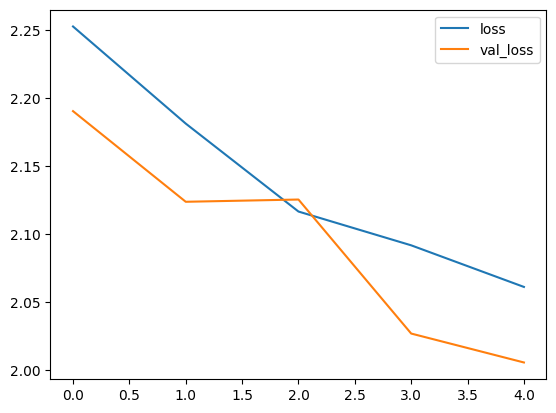

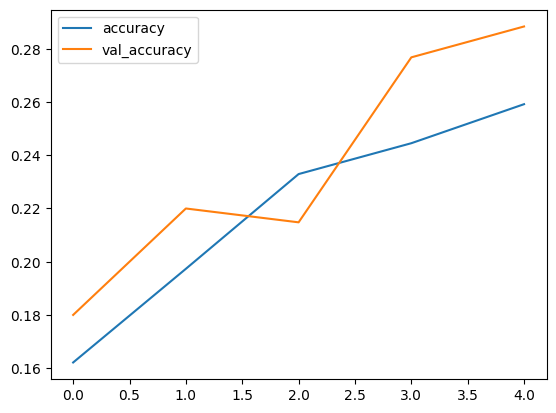

In [103]:
plt.plot(range(len(history_exercise_2.history["loss"])), history_exercise_2.history["loss"], label="loss")
plt.plot(range(len(history_exercise_2.history["loss"])), history_exercise_2.history["val_loss"], label="val_loss")
plt.legend()
plt.figure()
plt.plot(range(len(history_exercise_2.history["loss"])), history_exercise_2.history["accuracy"], label="accuracy")
plt.plot(range(len(history_exercise_2.history["loss"])), history_exercise_2.history["val_accuracy"], label="val_accuracy")
plt.legend()

In [124]:
# create the model
model_exercise_2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, 3, input_shape=(224, 224, 3), activation=tf.keras.activations.relu),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(32, 3, activation=tf.keras.activations.relu),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(32, 3, activation=tf.keras.activations.relu),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation="softmax")
])

# compile the model
model_exercise_2.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                         optimizer=tf.keras.optimizers.Adam(),
                         metrics=["accuracy"])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/2))

# fit the model
history_exercise_2 = model_exercise_2.fit(train_data_augmented,
                                          epochs=5,
                                          steps_per_epoch=len(train_data_augmented),
                                          validation_data=test_data,
                                          validation_steps=len(test_data),
                                          callbacks=[lr_scheduler])

Epoch 1/5
235/235 [==============================] - 151s 634ms/step - loss: 2.2606 - accuracy: 0.1656 - val_loss: 2.1767 - val_accuracy: 0.1732 - lr: 0.0010
Epoch 2/5
235/235 [==============================] - 143s 611ms/step - loss: 2.2547 - accuracy: 0.1660 - val_loss: 2.1541 - val_accuracy: 0.2300 - lr: 0.0032
Epoch 3/5
235/235 [==============================] - 141s 601ms/step - loss: 2.3114 - accuracy: 0.1055 - val_loss: 2.3037 - val_accuracy: 0.1000 - lr: 0.0100
Epoch 4/5
235/235 [==============================] - 148s 631ms/step - loss: 2.3068 - accuracy: 0.1060 - val_loss: 2.3060 - val_accuracy: 0.1000 - lr: 0.0316
Epoch 5/5
235/235 [==============================] - 142s 605ms/step - loss: 2.3165 - accuracy: 0.0940 - val_loss: 2.3191 - val_accuracy: 0.1000 - lr: 0.1000


Text(0.5, 1.0, 'learning rate vs loss')

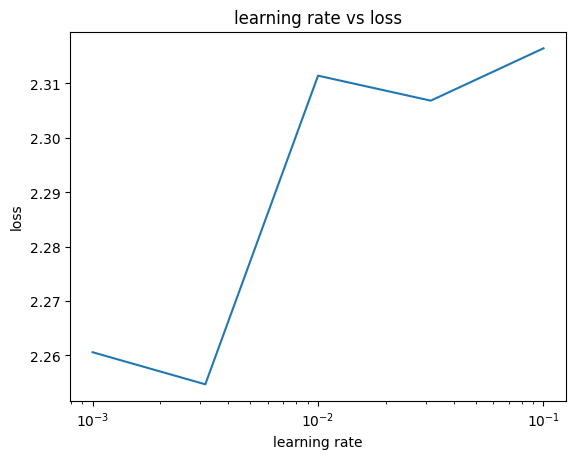

In [125]:
lrs = 1e-3 * 10**(tf.range(5)/2)
plt.semilogx(lrs, history_exercise_2.history["loss"])
plt.xlabel("learning rate")
plt.ylabel("loss")
plt.title("learning rate vs loss")

In [126]:
10 ** -3 - 10 ** -2

-0.009000000000000001